In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json

In [2]:
# Load csv file to DataFrame

tech_salaries = pd.read_csv("Data\Top tech companies comparison 2014_2015.csv")
tech_salaries = pd.DataFrame(tech_salaries)

In [3]:
tech_salaries

,Employer Name,Early Career Median Pay,Mid-Career Median Pay,Median Age,Years of Experience,Years with Company,% Female,% High Job Satisfaction,% High Job Meaning,% High Job Stress
0,HP,"$65,400","$104,200",38,7.7,6.3,32%,64%,41%,56%
1,Oracle,"$71,400","$126,400",37,9.0,5.3,29%,64%,32%,56%
2,IBM,"$72,700","$112,700",36,7.4,7.1,25%,59%,40%,62%
3,Microsoft,"$102,500","$139,700",33,6.4,4.8,27%,72%,59%,58%
4,Qualcomm,"$94,400","$132,500",33,7.7,4.3,20%,69%,50%,62%
5,Cisco,"$83,800","$134,700",33,6.7,4.0,23%,76%,60%,52%
6,eBay,"$88,900","$136,000",33,6.9,2.7,43%,78%,55%,66%
7,Samsung,"$65,900","$143,000",33,6.0,2.3,37%,64%,36%,69%
8,Intel,"$85,800","$129,400",32,5.5,5.0,25%,72%,66%,61%
9,Adobe,"$91,900","$141,900",31,5.2,3.3,28%,84%,24%,47%


In [4]:
tech_salaries_set = pd.DataFrame(tech_salaries[["Employer Name","Early Career Median Pay","Mid-Career Median Pay","Median Age","Years of Experience"]])
tech_salaries_set = tech_salaries_set[(tech_salaries_set["Employer Name"] != "SpaceX")].reset_index(drop=True)

# tech_salaries[["Early Career Median Pay","Mid-Career Median Pay"]] = tech_salaries[["Early Career Median Pay","Mid-Career Median Pay"]].replace('[\$\,\.]',"",regex=True).astype(int)

tech_salaries_set

,Employer Name,Early Career Median Pay,Mid-Career Median Pay,Median Age,Years of Experience
0,HP,"$65,400","$104,200",38,7.7
1,Oracle,"$71,400","$126,400",37,9.0
2,IBM,"$72,700","$112,700",36,7.4
3,Microsoft,"$102,500","$139,700",33,6.4
4,Qualcomm,"$94,400","$132,500",33,7.7
5,Cisco,"$83,800","$134,700",33,6.7
6,eBay,"$88,900","$136,000",33,6.9
7,Samsung,"$65,900","$143,000",33,6.0
8,Intel,"$85,800","$129,400",32,5.5
9,Adobe,"$91,900","$141,900",31,5.2


In [5]:
tech_salaries_set[["Early Career Median Pay","Mid-Career Median Pay"]] = tech_salaries_set[["Early Career Median Pay","Mid-Career Median Pay"]].replace('[\$\,\.]',"",regex=True).astype(int)

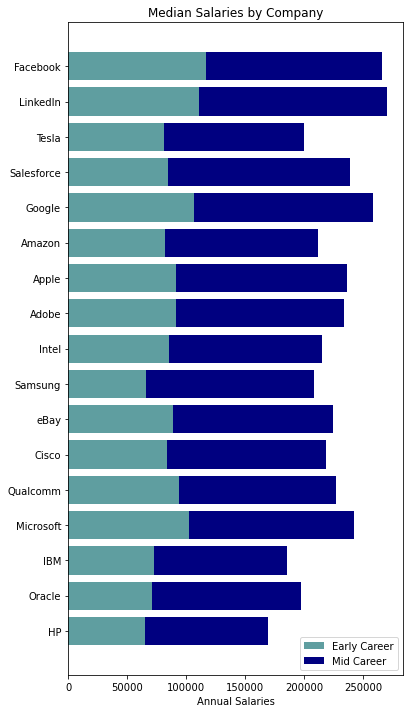

In [11]:
x = tech_salaries_set["Employer Name"]
y1 = tech_salaries_set["Early Career Median Pay"]
y2 = tech_salaries_set["Mid-Career Median Pay"]
width = len(x)      # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(6,12))

plt.barh(x, y1, label='Early Career',color='cadetblue')
plt.barh(x, y2, left=y1,label='Mid Career',color='navy')
# plt.xticks(rotation=90)
ax.set_xlabel('Annual Salaries')
ax.set_title('Median Salaries by Company')
ax.legend()

plt.show()

In [7]:
tech_salaries_set["Increase"] = tech_salaries_set[['Mid-Career Median Pay','Early Career Median Pay']].apply(lambda row: (row.iloc[0]-row.iloc[1])/row.iloc[0]*100, axis=1)


In [8]:
tech_salaries_set

,Employer Name,Early Career Median Pay,Mid-Career Median Pay,Median Age,Years of Experience,Increase
0,HP,65400,104200,38,7.7,37.236084
1,Oracle,71400,126400,37,9.0,43.512658
2,IBM,72700,112700,36,7.4,35.492458
3,Microsoft,102500,139700,33,6.4,26.628490
4,Qualcomm,94400,132500,33,7.7,28.754717
5,Cisco,83800,134700,33,6.7,37.787676
6,eBay,88900,136000,33,6.9,34.632353
7,Samsung,65900,143000,33,6.0,53.916084
8,Intel,85800,129400,32,5.5,33.693972
9,Adobe,91900,141900,31,5.2,35.236082
